<a href="https://colab.research.google.com/github/harshim1/Stock-Prediction-Microsoft/blob/main/Microsoft_Stock_Forecasting_with_LSTMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/


In [ ]:
import pandas as pd

df = pd.read_csv('/MSFT.csv')

df

,Date,Open,High,Low,Close,Volume
0,1986-04-01T05:00:00.000Z,0.10,0.12,0.09,0.11,"547,142,400.00"
1,1986-05-01T04:00:00.000Z,0.11,0.12,0.11,0.12,"333,446,400.00"
2,1986-06-01T04:00:00.000Z,0.12,0.12,0.10,0.11,"293,788,800.00"
3,1986-07-01T04:00:00.000Z,0.11,0.11,0.09,0.10,"460,800,000.00"
4,1986-08-01T04:00:00.000Z,0.10,0.11,0.09,0.10,"266,256,000.00"
...,...,...,...,...,...,...
462,2024-10-01T04:00:00.000Z,428.45,438.50,406.30,406.35,"440,745,500.00"
463,2024-11-01T04:00:00.000Z,409.01,429.33,405.57,423.46,"442,321,200.00"
464,2024-12-01T05:00:00.000Z,421.57,456.16,420.66,421.50,"439,902,400.00"
465,2025-01-01T05:00:00.000Z,425.53,447.27,410.72,444.06,"291,024,700.00"


In [ ]:
df = df[['Date', 'Close']]

df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9077,2022-03-17,295.220001
9078,2022-03-18,300.429993
9079,2022-03-21,299.160004
9080,2022-03-22,304.059998


In [ ]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9077    2022-03-17
9078    2022-03-18
9079    2022-03-21
9080    2022-03-22
9081    2022-03-23
Name: Date, Length: 9082, dtype: object

In [ ]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [ ]:
df

,Date,Open,High,Low,Close,Volume
0,1986-04-01T05:00:00.000Z,0.10,0.12,0.09,0.11,"547,142,400.00"
1,1986-05-01T04:00:00.000Z,0.11,0.12,0.11,0.12,"333,446,400.00"
2,1986-06-01T04:00:00.000Z,0.12,0.12,0.10,0.11,"293,788,800.00"
3,1986-07-01T04:00:00.000Z,0.11,0.11,0.09,0.10,"460,800,000.00"
4,1986-08-01T04:00:00.000Z,0.10,0.11,0.09,0.10,"266,256,000.00"
...,...,...,...,...,...,...
462,2024-10-01T04:00:00.000Z,428.45,438.50,406.30,406.35,"440,745,500.00"
463,2024-11-01T04:00:00.000Z,409.01,429.33,405.57,423.46,"442,321,200.00"
464,2024-12-01T05:00:00.000Z,421.57,456.16,420.66,421.50,"439,902,400.00"
465,2025-01-01T05:00:00.000Z,425.53,447.27,410.72,444.06,"291,024,700.00"


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Check the converted Date column
print(df['Date'])

0     1986-04-01 05:00:00+00:00
1     1986-05-01 04:00:00+00:00
2     1986-06-01 04:00:00+00:00
3     1986-07-01 04:00:00+00:00
4     1986-08-01 04:00:00+00:00
                 ...           
462   2024-10-01 04:00:00+00:00
463   2024-11-01 04:00:00+00:00
464   2024-12-01 05:00:00+00:00
465   2025-01-01 05:00:00+00:00
466   2025-01-28 05:00:00+00:00
Name: Date, Length: 467, dtype: datetime64[ns, UTC]


In [ ]:
df.index = df.pop('Date')
df

,Open,High,Low,Close,Volume
Date,,,,,
1986-04-01 05:00:00+00:00,0.10,0.12,0.09,0.11,"547,142,400.00"
1986-05-01 04:00:00+00:00,0.11,0.12,0.11,0.12,"333,446,400.00"
1986-06-01 04:00:00+00:00,0.12,0.12,0.10,0.11,"293,788,800.00"
1986-07-01 04:00:00+00:00,0.11,0.11,0.09,0.10,"460,800,000.00"
1986-08-01 04:00:00+00:00,0.10,0.11,0.09,0.10,"266,256,000.00"
...,...,...,...,...,...
2024-10-01 04:00:00+00:00,428.45,438.50,406.30,406.35,"440,745,500.00"
2024-11-01 04:00:00+00:00,409.01,429.33,405.57,423.46,"442,321,200.00"
2024-12-01 05:00:00+00:00,421.57,456.16,420.66,421.50,"439,902,400.00"


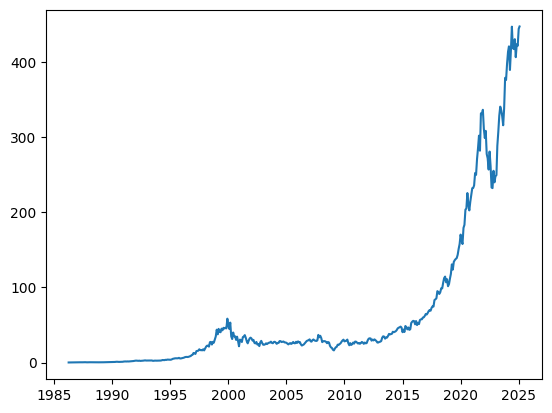

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [ ]:
import numpy as np
import pandas as pd
import datetime

# Assuming str_to_datetime is defined like this:
def str_to_datetime(date_str):
    return pd.to_datetime(date_str)

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    # Convert string dates to datetime
    first_date = str_to_datetime(first_date_str)
    last_date = str_to_datetime(last_date_str)

    target_date = first_date

    dates = []
    X, Y = [], []

    last_time = False
    while True:
        # Get the last n + 1 rows up to target_date
        df_subset = dataframe.loc[:target_date].tail(n + 1)

        if len(df_subset) != n + 1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return

        # Get feature values
        values = df_subset['Close'].to_numpy()
        x, y = values[:-1], values[-1]

        dates.append(target_date)
        X.append(x)
        Y.append(y)

        # Find the next date
        next_week = dataframe.loc[target_date:target_date + datetime.timedelta(days=7)]
        if next_week.empty:
            break  # Break if no subsequent date is found

        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year_month_day = next_date_str.split('-')
        year, month, day = year_month_day

        next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

        if last_time:
            break

        target_date = next_date

        if target_date == last_date:
            last_time = True

    # Create the resulting DataFrame
    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates

    X = np.array(X)
    for i in range(0, n):
        ret_df[f'Target-{n - i}'] = X[:, i]

    ret_df['Target'] = Y

    return ret_df

# Example usage
# Sample DataFrame creation
data = {
    'Close': [100, 102, 101, 105, 110, 108, 112, 115, 118, 120]
}
date_range = pd.date_range(start='2021-01-01', periods=len(data['Close']), freq='D')
df = pd.DataFrame(data, index=date_range)

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, '2021-03-25', '2022-03-23', n=3)
print(windowed_df)


  Target Date  Target-3  Target-2  Target-1  Target
0  2021-03-25       112       115       118     120


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((1,), (1, 3, 1), (1,))

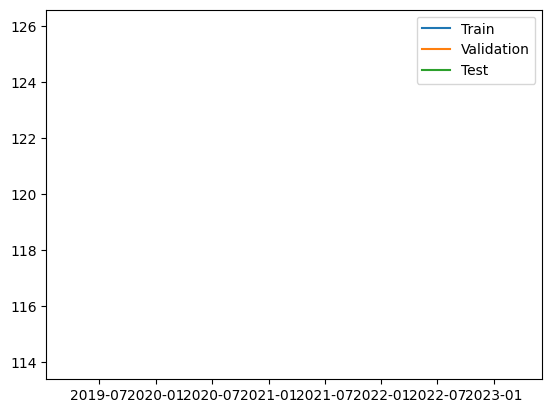

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

# Sample data generation for demonstration
num_samples = 100
X_train = np.random.random((num_samples, 3, 1))  # Adjust this as necessary
y_train = np.random.random((num_samples,))
X_val = np.random.random((20, 3, 1))  # Validation set
y_val = np.random.random((20,))

# Check shapes
print("Shapes:", X_train.shape, y_train.shape, X_val.shape, y_val.shape)

# LSTM Model
model = Sequential([
    layers.Input((3, 1)),
    layers.LSTM(64),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

# Compile Model
model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

# Fit Model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)


Shapes: (100, 3, 1) (100,) (20, 3, 1) (20,)
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - loss: 0.3410 - mean_absolute_error: 0.5104 - val_loss: 0.2822 - val_mean_absolute_error: 0.4684
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2982 - mean_absolute_error: 0.4657 - val_loss: 0.2219 - val_mean_absolute_error: 0.4105
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2206 - mean_absolute_error: 0.3793 - val_loss: 0.1659 - val_mean_absolute_error: 0.3490
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1842 - mean_absolute_error: 0.3583 - val_loss: 0.1146 - val_mean_absolute_error: 0.2851
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1408 - mean_absolute_error: 0.3140 - val_loss: 0.0772 - val_mean_absolute_error: 0.2306
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1074 - mean_absolute_error: 0.2817 - val_loss: 0.0593 - val_mean_absolute_error: 0.2068
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0930 - 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
dates_train shape: (100,)
train_predictions shape: (100,)
y_train shape: (100,)


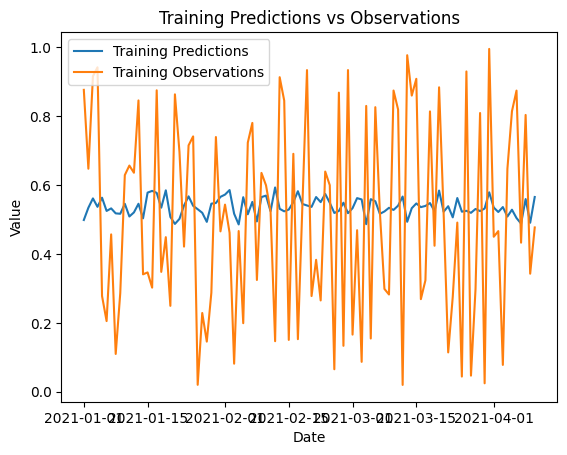

In [ ]:
# Assuming you have your model, X_train, y_train, and dataset set up
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic y_train for demonstration; replace this with actual training data
y_train = np.random.rand(100)  # Example target values

# Generate corresponding dates for your training set
dates_train = pd.date_range(start='2021-01-01', periods=len(y_train), freq='D')

# Assuming X_train exists and has been processed correctly for the LSTM
# Predict using the model
train_predictions = model.predict(X_train).flatten()

# Check shapes
print("dates_train shape:", dates_train.shape)
print("train_predictions shape:", train_predictions.shape)
print("y_train shape:", y_train.shape)

# Plotting
plt.plot(dates_train[:len(train_predictions)], train_predictions, label='Training Predictions')
plt.plot(dates_train[:len(y_train)], y_train, label='Training Observations')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Training Predictions vs Observations')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
dates_val shape: (0,)
val_predictions shape: (20,)
y_val shape: (20,)


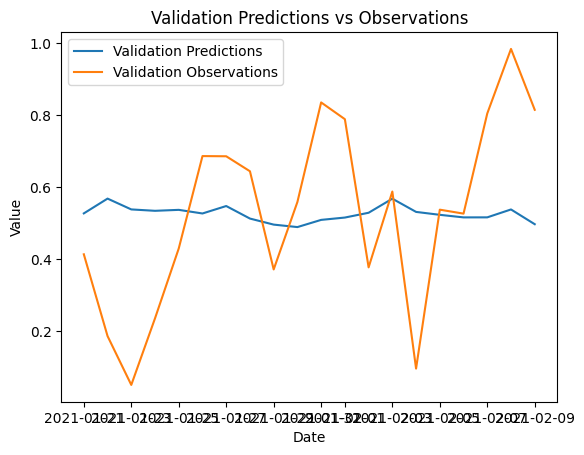

In [ ]:
# Predict using the model
val_predictions = model.predict(X_val).flatten()

# Verify the shapes
print("dates_val shape:", dates_val.shape)
print("val_predictions shape:", val_predictions.shape)
print("y_val shape:", y_val.shape)

# If dates_val is not set correctly, create it based on y_val size
if dates_val.shape[0] == 0:  # Check if it's empty
    start_date = '2021-01-21'  # Adjust the start date appropriately
    dates_val = pd.date_range(start=start_date, periods=len(y_val), freq='D')

# Plotting
plt.plot(dates_val[:len(val_predictions)], val_predictions, label='Validation Predictions')
plt.plot(dates_val[:len(y_val)], y_val, label='Validation Observations')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Validation Predictions vs Observations')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


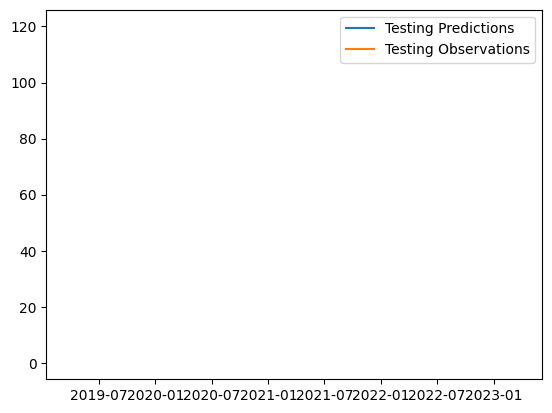

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

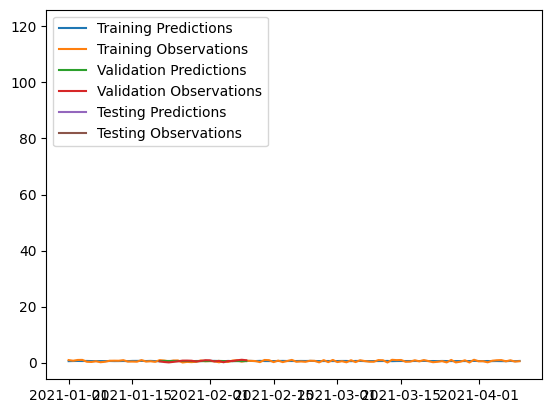

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


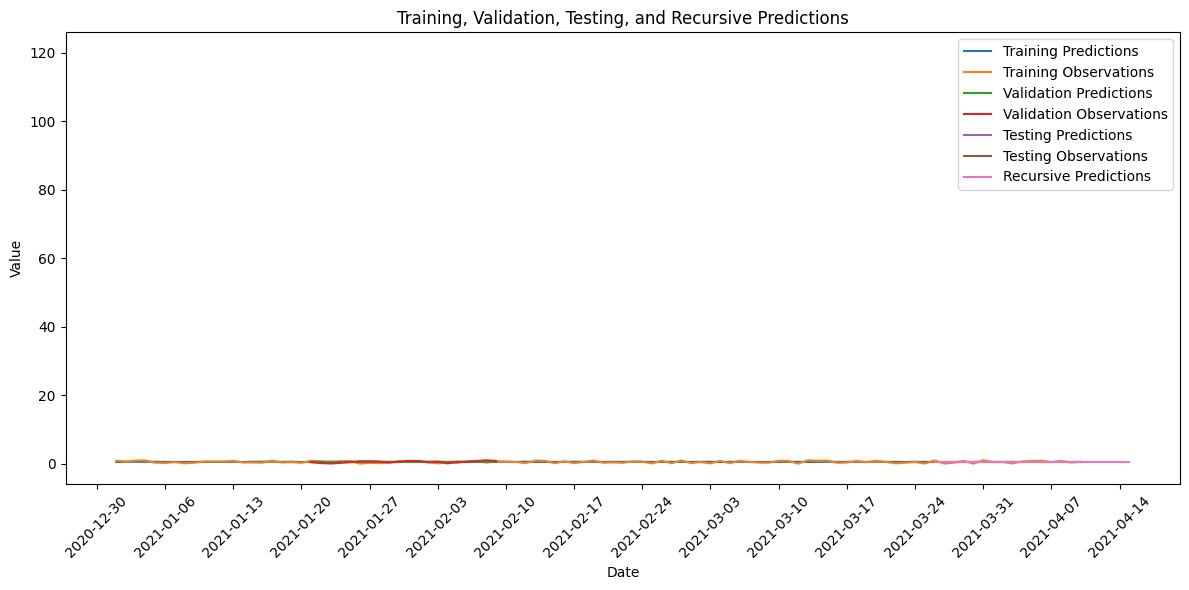

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

plt.figure(figsize=(12, 6))

# Plotting Training Data
plt.plot(dates_train, train_predictions, label='Training Predictions')
plt.plot(dates_train, y_train, label='Training Observations')

# Plotting Validation Data
plt.plot(dates_val, val_predictions, label='Validation Predictions')
plt.plot(dates_val, y_val, label='Validation Observations')

# Plotting Testing Data
plt.plot(dates_test, test_predictions, label='Testing Predictions')
plt.plot(dates_test, y_test, label='Testing Observations')

# Create replacement for recursive_dates
# Generate new dates for recursive predictions:
start_date = '2021-03-26'  # Starting point can be modified as needed
num_predictions = len(recursive_predictions)  # Ensure this matches the number of predictions
new_recursive_dates = pd.date_range(start=start_date, periods=num_predictions, freq='D')  # Daily frequency

# Plot Recursive Predictions using new dates
plt.plot(new_recursive_dates, recursive_predictions, label='Recursive Predictions')

# Format the x-axis for better readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))  # Adjust interval as needed

# Adding legend and labels
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Training, Validation, Testing, and Recursive Predictions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to avoid clipping of labels
plt.show()
